In [22]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [23]:
df = pd.read_csv("adult.csv")
df

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [24]:
column_names = ["Age","work class","Fnlwgt", "Education", "Education_number", "martial_status", "occupation" ,"relationship" ,"race","sex","capital_gain","capital_loss","hours_per_week","native_country","income"]

In [25]:
df.columns = column_names
df

,Age,work class,Fnlwgt,Education,Education_number,martial_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [26]:
df1 = df.dropna()

In [27]:
X = df1.drop('income',axis='columns')
y = df1.income

In [28]:
from sklearn.linear_model import LogisticRegression

In [29]:
from sklearn.preprocessing import LabelEncoder

In [30]:
le = LabelEncoder()
X["workClass"] = le.fit_transform(X['work class'])
X["Education1"] = le.fit_transform(X['Education'])
X["sex1"] = le.fit_transform(X['sex'])
X["martial_status1"] = le.fit_transform(X['martial_status'])
X["occupation1"] = le.fit_transform(X['occupation'])
X["relationship1"] = le.fit_transform(X['relationship'])
X["race1"] = le.fit_transform(X['race'])
X["native_country1"] = le.fit_transform(X['native_country'])

In [31]:
X1 = X.drop( ["work class","sex", "Education", "martial_status", "occupation" ,"relationship" ,"race","native_country"],axis='columns')
X1

,Age,Fnlwgt,Education_number,capital_gain,capital_loss,hours_per_week,workClass,Education1,sex1,martial_status1,occupation1,relationship1,race1,native_country1
0,50,83311,13,0,0,13,6,9,1,2,4,0,4,39
1,38,215646,9,0,0,40,4,11,1,0,6,1,4,39
2,53,234721,7,0,0,40,4,1,1,2,6,0,2,39
3,28,338409,13,0,0,40,4,9,0,2,10,5,2,5
4,37,284582,14,0,0,40,4,12,0,2,4,5,4,39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,257302,12,0,0,38,4,7,0,2,13,5,4,39
32556,40,154374,9,0,0,40,4,11,1,2,7,0,4,39
32557,58,151910,9,0,0,40,4,11,0,6,1,4,4,39
32558,22,201490,9,0,0,20,4,11,1,4,1,3,4,39


In [50]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
X_train, X_test, y_train, y_test = train_test_split(X1,y,test_size=0.2)

In [16]:
# Logistic Regression

In [33]:
lr = LogisticRegression()

In [34]:
lr.fit(X_train,y_train)

LogisticRegression()

In [35]:
y_predicted = lr.predict(X_test)
y_predicted

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' <=50K'],
      dtype=object)

In [36]:
lr.score(X_test,y_test)

0.793458230958231

In [37]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_predicted)
cm

array([[4761,  151],
       [1194,  406]], dtype=int64)

Text(69.0, 0.5, 'Truth')

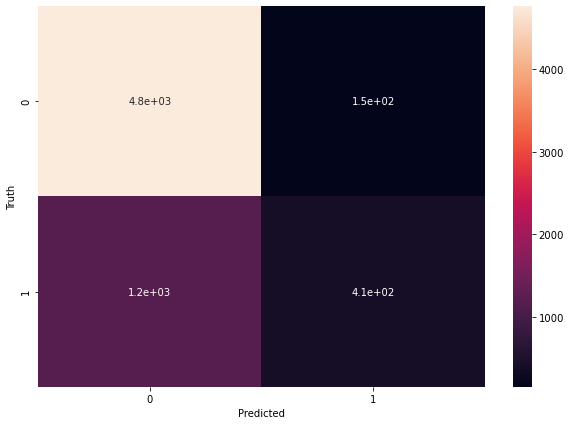

In [38]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [51]:
cr = classification_report(y_test, y_predicted)
print(cr) 

              precision    recall  f1-score   support

       <=50K       0.76      0.91      0.83      4965
        >50K       0.22      0.08      0.12      1547

    accuracy                           0.71      6512
   macro avg       0.49      0.50      0.47      6512
weighted avg       0.63      0.71      0.66      6512



In [55]:
#decision tree

In [39]:
from sklearn import tree
model = tree.DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [40]:
model.score(X_test, y_test)

0.8115786240786241

In [41]:
y_predTree = model.predict(X_test)
y_predTree

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' <=50K'],
      dtype=object)

In [42]:
cm1 = confusion_matrix(y_test,y_predTree)
cm1

array([[4302,  610],
       [ 617,  983]], dtype=int64)

Text(69.0, 0.5, 'Truth')

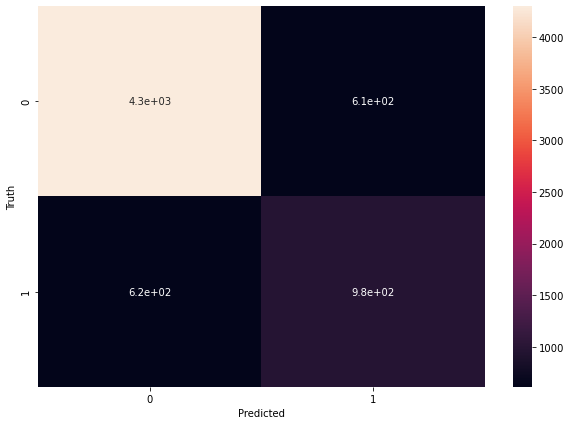

In [43]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm1, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [52]:
cr1 = classification_report(y_test, y_predTree)
print(cr1) 

              precision    recall  f1-score   support

       <=50K       0.76      0.76      0.76      4965
        >50K       0.24      0.25      0.24      1547

    accuracy                           0.63      6512
   macro avg       0.50      0.50      0.50      6512
weighted avg       0.64      0.63      0.64      6512



In [62]:
#Random Forest classifier

In [44]:
from sklearn.ensemble import RandomForestClassifier
model1 = RandomForestClassifier(n_estimators=20)
model1.fit(X_train, y_train)

RandomForestClassifier(n_estimators=20)

In [45]:
model1.score(X_test, y_test)

0.8495085995085995

In [46]:
y_pred2 = model1.predict(X_test)

In [47]:
cm2 = confusion_matrix(y_test, y_pred2)
cm2

array([[4575,  337],
       [ 643,  957]], dtype=int64)

Text(69.0, 0.5, 'Truth')

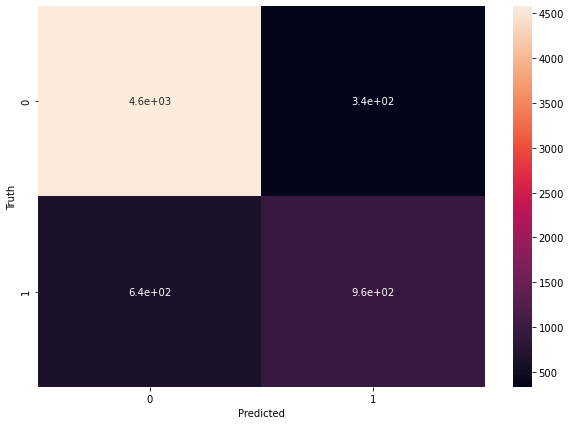

In [48]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm2, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [70]:
cr2 = classification_report(y_test, y_pred2)
print(cr2)

              precision    recall  f1-score   support

       <=50K       0.76      0.80      0.78      4965
        >50K       0.24      0.20      0.22      1547

    accuracy                           0.66      6512
   macro avg       0.50      0.50      0.50      6512
weighted avg       0.64      0.66      0.65      6512



In [49]:
#SVC 

In [54]:
from sklearn.svm import LinearSVC

In [56]:
lsvc = LinearSVC()
lsvc.fit(X_train, y_train)

C:\Users\THARUN REDDY\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


LinearSVC()

In [57]:
lsvc.score(X_test, y_test)

0.8006756756756757

In [58]:
y_pred3 = lsvc.predict(X_test)

In [73]:
cm3 = confusion_matrix(y_test, y_pred3)
cm3

array([[4913,   52],
       [1246,  301]], dtype=int64)

Text(69.0, 0.5, 'Truth')

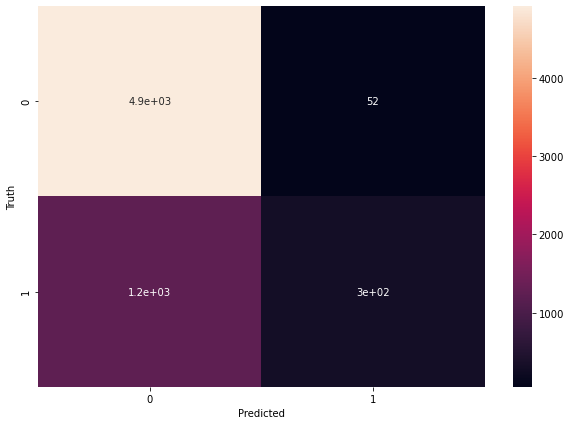

In [60]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm3, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [74]:
cr3 = classification_report(y_test, y_pred3)
print(cr3) 

              precision    recall  f1-score   support

       <=50K       0.80      0.99      0.88      4965
        >50K       0.85      0.19      0.32      1547

    accuracy                           0.80      6512
   macro avg       0.83      0.59      0.60      6512
weighted avg       0.81      0.80      0.75      6512



In [62]:
#KNN Classifier

In [63]:
#Fitting K-NN classifier to the training set  
from sklearn.neighbors import KNeighborsClassifier  
classifier= KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2 )  
classifier.fit(X_train, y_train)  

KNeighborsClassifier()

In [65]:
classifier.score(X_test,y_test)

0.7757985257985258

In [64]:
y_pred4= classifier.predict(X_test)  

In [66]:
cm4 = confusion_matrix(y_test, y_pred4)
cm4

array([[4552,  413],
       [1047,  500]], dtype=int64)

Text(69.0, 0.5, 'Truth')

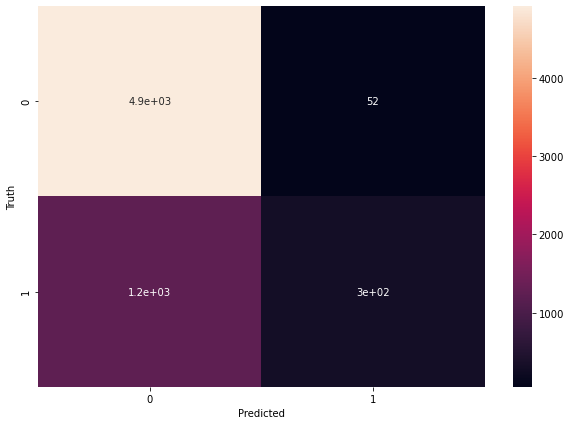

In [67]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm3, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [75]:
cr4 = classification_report(y_test, y_pred4)
print(cr4) 

              precision    recall  f1-score   support

       <=50K       0.81      0.92      0.86      4965
        >50K       0.55      0.32      0.41      1547

    accuracy                           0.78      6512
   macro avg       0.68      0.62      0.63      6512
weighted avg       0.75      0.78      0.75      6512

